In [37]:
import akshare as ak
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'SimHei' # 中文字体
plt.rcParams['axes.unicode_minus'] = False # 负号

# 获取2022年1月1日至2024年6月12日中国平安A股的日交易数据
stock_data = ak.stock_zh_a_hist(symbol="601318", period="daily", start_date="20220101", end_date="20240612", adjust="qfq")

# 打印原始数据的前5行
print(stock_data.head())


           日期    股票代码     开盘     收盘     最高     最低      成交量           成交额  \
0  2022-01-04  601318  45.55  46.15  46.21  45.25   635838  3.221367e+09   
1  2022-01-05  601318  46.26  47.22  47.55  46.12  1181247  6.124174e+09   
2  2022-01-06  601318  47.14  46.45  47.17  46.37   661658  3.408948e+09   
3  2022-01-07  601318  46.64  48.09  48.48  46.60  1230760  6.481039e+09   
4  2022-01-10  601318  48.14  48.23  48.71  47.65   761134  4.033301e+09   

     振幅   涨跌幅   涨跌额   换手率  
0  2.11  1.29  0.59  0.59  
1  3.10  2.32  1.07  1.09  
2  1.69 -1.63 -0.77  0.61  
3  4.05  3.53  1.64  1.14  
4  2.20  0.29  0.14  0.70  


In [38]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 将日期列转换为字符串格式
stock_data['日期'] = stock_data['日期'].astype(str)

# 提取2024年5月13日至2024年6月12日的数据
B = stock_data[(stock_data['日期'] >= '2024-05-13') & (stock_data['日期'] <= '2024-06-12')][['日期', '收盘']]
B = B.to_numpy()

# 提取2022年1月1日至2024年5月12日的数据作为数据集A
A = stock_data[stock_data['日期'] < '2024-05-13']

# 对数据集A的收盘价进行归一化处理
scaler = MinMaxScaler(feature_range=(0, 1))
A['收盘'] = scaler.fit_transform(A['收盘'].values.reshape(-1, 1))

# 打印处理后的前5行数据
print(A['收盘'].head(5))


0    0.662227
1    0.719233
2    0.678210
3    0.765583
4    0.773042
Name: 收盘, dtype: float64


<ipython-input-38-ca6cec5c0f9c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A['收盘'] = scaler.fit_transform(A['收盘'].values.reshape(-1, 1))


In [39]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# 数据集A的特征和标签
X = A[['收盘']].values
y = A['收盘'].values

# 将数据集A划分为训练集、验证集和测试集
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 将数据转换为LSTM所需的形状
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# 构建LSTM模型
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dense(1)
])

# 编译模型
model.compile(optimizer='adam', loss='mse')

# 训练模型
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=2, shuffle=False)


Epoch 1/50
11/11 - 4s - loss: 0.2776 - val_loss: 0.2617 - 4s/epoch - 383ms/step
Epoch 2/50
11/11 - 0s - loss: 0.2236 - val_loss: 0.2028 - 77ms/epoch - 7ms/step
Epoch 3/50
11/11 - 0s - loss: 0.1637 - val_loss: 0.1350 - 65ms/epoch - 6ms/step
Epoch 4/50
11/11 - 0s - loss: 0.0972 - val_loss: 0.0658 - 66ms/epoch - 6ms/step
Epoch 5/50
11/11 - 0s - loss: 0.0388 - val_loss: 0.0209 - 62ms/epoch - 6ms/step
Epoch 6/50
11/11 - 0s - loss: 0.0169 - val_loss: 0.0161 - 62ms/epoch - 6ms/step
Epoch 7/50
11/11 - 0s - loss: 0.0181 - val_loss: 0.0146 - 62ms/epoch - 6ms/step
Epoch 8/50
11/11 - 0s - loss: 0.0151 - val_loss: 0.0133 - 65ms/epoch - 6ms/step
Epoch 9/50
11/11 - 0s - loss: 0.0140 - val_loss: 0.0125 - 74ms/epoch - 7ms/step
Epoch 10/50
11/11 - 0s - loss: 0.0118 - val_loss: 0.0110 - 72ms/epoch - 7ms/step
Epoch 11/50
11/11 - 0s - loss: 0.0113 - val_loss: 0.0099 - 62ms/epoch - 6ms/step
Epoch 12/50
11/11 - 0s - loss: 0.0099 - val_loss: 0.0089 - 67ms/epoch - 6ms/step
Epoch 13/50
11/11 - 0s - loss: 0.0100

In [40]:
# 提取2024年5月13日至2024年6月12日的数据作为输入特征
X_future = B[:, 1].reshape(-1, 1)
X_future = scaler.transform(X_future)
X_future = X_future.reshape((X_future.shape[0], 1, X_future.shape[1]))

# 使用模型进行预测
predictions = model.predict(X_future)
predictions = scaler.inverse_transform(predictions)

# 打印预测的日期和预测值，并保存在二维数组C里
C = np.column_stack((B[:, 0], predictions))
print(C)


1/1 [==============================] - 1s 655ms/step
[['2024-05-13' 42.515907287597656]
 ['2024-05-14' 42.18915557861328]
 ['2024-05-15' 41.744041442871094]
 ['2024-05-16' 42.90544891357422]
 ['2024-05-17' 45.094234466552734]
 ['2024-05-20' 45.36977767944336]
 ['2024-05-21' 45.30598068237305]
 ['2024-05-22' 45.30598068237305]
 ['2024-05-23' 44.65407180786133]
 ['2024-05-24' 43.74153518676758]
 ['2024-05-27' 43.954376220703125]
 ['2024-05-28' 43.61054229736328]
 ['2024-05-29' 43.320438385009766]
 ['2024-05-30' 43.003700256347656]
 ['2024-05-31' 42.925071716308594]
 ['2024-06-03' 42.98402404785156]
 ['2024-06-04' 43.1220588684082]
 ['2024-06-05' 42.93489074707031]
 ['2024-06-06' 42.323219299316406]
 ['2024-06-07' 42.008296966552734]
 ['2024-06-11' 41.734657287597656]
 ['2024-06-12' 41.334251403808594]]


In [41]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# 将日期列转换为datetime对象
B[:, 0] = [datetime.strptime(date, '%Y-%m-%d') for date in B[:, 0]]
C[:, 0] = [datetime.strptime(date, '%Y-%m-%d') for date in C[:, 0]]


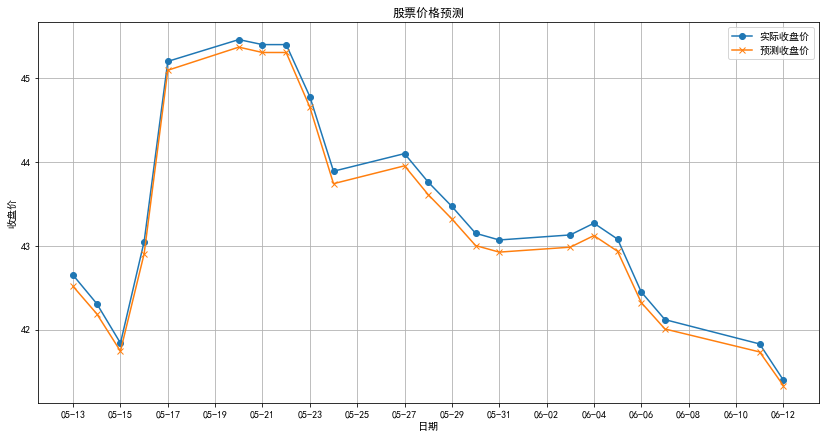

In [42]:
# 绘制折线图
plt.figure(figsize=(14, 7))
plt.plot(B[:, 0], B[:, 1], label='实际收盘价', marker='o')
plt.plot(C[:, 0], C[:, 1], label='预测收盘价', marker='x')

# 设置横坐标格式为月日
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))  # 每隔2天显示一个日期

# 设置其他图形属性
plt.xlabel('日期')
plt.ylabel('收盘价')
plt.title('股票价格预测')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 计算评估指标
mse = mean_squared_error(B[:, 1], predictions)
mae = mean_absolute_error(B[:, 1], predictions)
rmse = np.sqrt(mse)
r2 = r2_score(B[:, 1], predictions)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")


MSE: 0.01600587938664251
MAE: 0.12401539889248946
RMSE: 0.12651434458843988
R2: 0.9889713832183518


# 代码汇总

           日期    股票代码     开盘     收盘     最高     最低      成交量           成交额  \
0  2022-01-04  601318  45.55  46.15  46.21  45.25   635838  3.221367e+09   
1  2022-01-05  601318  46.26  47.22  47.55  46.12  1181247  6.124174e+09   
2  2022-01-06  601318  47.14  46.45  47.17  46.37   661658  3.408948e+09   
3  2022-01-07  601318  46.64  48.09  48.48  46.60  1230760  6.481039e+09   
4  2022-01-10  601318  48.14  48.23  48.71  47.65   761134  4.033301e+09   

     振幅   涨跌幅   涨跌额   换手率  
0  2.11  1.29  0.59  0.59  
1  3.10  2.32  1.07  1.09  
2  1.69 -1.63 -0.77  0.61  
3  4.05  3.53  1.64  1.14  
4  2.20  0.29  0.14  0.70  
0    0.662227
1    0.719233
2    0.678210
3    0.765583
4    0.773042
Name: 收盘, dtype: float64


<ipython-input-45-3be8f0d8219c>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A['收盘'] = scaler.fit_transform(A['收盘'].values.reshape(-1, 1))


Epoch 1/50
11/11 - 4s - loss: 0.2784 - val_loss: 0.2613 - 4s/epoch - 362ms/step
Epoch 2/50
11/11 - 0s - loss: 0.2225 - val_loss: 0.1995 - 81ms/epoch - 7ms/step
Epoch 3/50
11/11 - 0s - loss: 0.1591 - val_loss: 0.1292 - 74ms/epoch - 7ms/step
Epoch 4/50
11/11 - 0s - loss: 0.0921 - val_loss: 0.0603 - 77ms/epoch - 7ms/step
Epoch 5/50
11/11 - 0s - loss: 0.0364 - val_loss: 0.0191 - 73ms/epoch - 7ms/step
Epoch 6/50
11/11 - 0s - loss: 0.0162 - val_loss: 0.0161 - 74ms/epoch - 7ms/step
Epoch 7/50
11/11 - 0s - loss: 0.0174 - val_loss: 0.0143 - 70ms/epoch - 6ms/step
Epoch 8/50
11/11 - 0s - loss: 0.0151 - val_loss: 0.0132 - 65ms/epoch - 6ms/step
Epoch 9/50
11/11 - 0s - loss: 0.0129 - val_loss: 0.0123 - 66ms/epoch - 6ms/step
Epoch 10/50
11/11 - 0s - loss: 0.0116 - val_loss: 0.0109 - 63ms/epoch - 6ms/step
Epoch 11/50
11/11 - 0s - loss: 0.0114 - val_loss: 0.0098 - 64ms/epoch - 6ms/step
Epoch 12/50
11/11 - 0s - loss: 0.0099 - val_loss: 0.0087 - 64ms/epoch - 6ms/step
Epoch 13/50
11/11 - 0s - loss: 0.0093

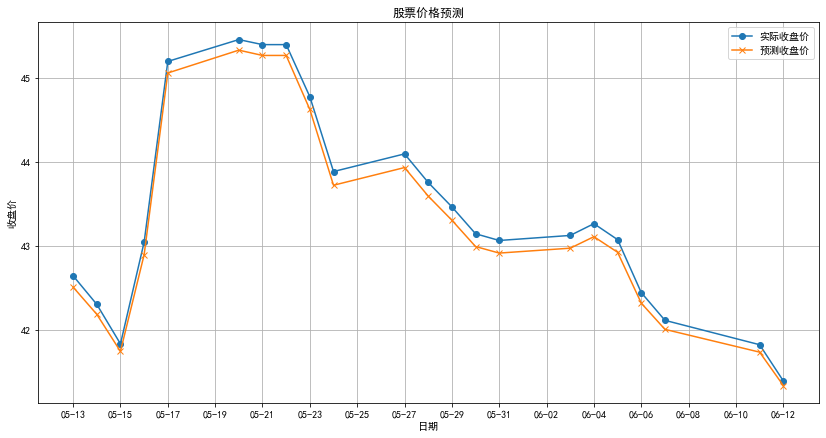

MSE: 0.018680288794124533
MAE: 0.13387413718483676
RMSE: 0.13667585300309829
R2: 0.987128620583456


In [45]:
import akshare as ak
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# 第一步：数据爬取
stock_data = ak.stock_zh_a_hist(symbol="601318", period="daily", start_date="20220101", end_date="20240612", adjust="qfq")
print(stock_data.head())

# 第二步：数据预处理
stock_data['日期'] = stock_data['日期'].astype(str)
B = stock_data[(stock_data['日期'] >= '2024-05-13') & (stock_data['日期'] <= '2024-06-12')][['日期', '收盘']]
B = B.to_numpy()
A = stock_data[stock_data['日期'] < '2024-05-13']
scaler = MinMaxScaler(feature_range=(0, 1))
A['收盘'] = scaler.fit_transform(A['收盘'].values.reshape(-1, 1))
print(A['收盘'].head())

# 第三步：模型训练
X = A[['收盘']].values
y = A['收盘'].values
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=2, shuffle=False)

# 第四步：股票预测
X_future = B[:, 1].reshape(-1, 1)
X_future = scaler.transform(X_future)
X_future = X_future.reshape((X_future.shape[0], 1, X_future.shape[1]))
predictions = model.predict(X_future)
predictions = scaler.inverse_transform(predictions)
C = np.column_stack((B[:, 0], predictions))
print(C)

# 第五步：数据可视化
B[:, 0] = [datetime.strptime(date, '%Y-%m-%d') for date in B[:, 0]]
C[:, 0] = [datetime.strptime(date, '%Y-%m-%d') for date in C[:, 0]]

plt.figure(figsize=(14, 7))
plt.plot(B[:, 0], B[:, 1], label='实际收盘价', marker='o')
plt.plot(C[:, 0], C[:, 1], label='预测收盘价', marker='x')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))
plt.xlabel('日期')
plt.ylabel('收盘价')
plt.title('股票价格预测')
plt.legend()
plt.grid(True)
plt.show()

# 第六步：模型评估
mse = mean_squared_error(B[:, 1], predictions)
mae = mean_absolute_error(B[:, 1], predictions)
rmse = np.sqrt(mse)
r2 = r2_score(B[:, 1], predictions)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")
